# Практическая работа №1: Основы анализа и моделирования социальных сетей

Выполнил студент гр. 3385 Тарасов Матвей Михайлович. Вариант №13 (нечет).

## Цель работы

Овладеть навыками работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей.

## Основные теоретические положения


**Стандартные метрики сети:**

Плотность ненаправленной сети:

$$\Delta = \frac{2L}{g(g-1)}$$

Плотность направленной сети:

$$\Delta = \frac{L}{g(g-1)}$$

Где $L$ - количество ребер в сети, $g$ - число акторов.

Коэффициент кластеризации (глобальный):

$$C = \frac{3 \text{Triangle}}{\text{Angle}}$$

Где Triangle - количество треугольников, Angle - количество (открытых и закрытых) троек (уголков)

Растояние между двумя узлами сети:

$$d(n_i, n_j) = \min |\mathrm{path(n_i, n_j)}|$$

Иными словами, это минимальный возможный путь между этими узлами.

Диаметр сети это максимальное растояние между её узлами.

**Меры центральности:**

По степени:
$$C_D(n_i) = \sum\limits_{j=1}^{g}x_{ij}$$
Где $x_{ij}$ это элемент социоматрицы, $1$ или $0$.
Нормализованный вериант:
$$C'_D(n_i) = \frac{C_D(n_i)}{g-1}$$

По близости:
$$C_C(n_i) = \frac{1}{\sum_{j \neq i} d(n_i, n_j)}$$
Нормализованный вериант:
$$C'_C(n_i) = \frac{g-1}{\sum_{j \neq i} d(n_i, n_j)}$$

По постреднечеству:
$$C_B(n_i) = \sum\limits_{j < k}\frac{σ_{jk}(i)}{\sigma_{jk}}$$
Где $σ_{jk}$ - количетсво кратчайших путей между $k$ и $j$, а $σ_{jk}(i)$ - количетсво кратчайших путей между $k$ и $j$, проходящих через $i$. Нормализация:
$$C'_B(n_i) = \frac{2C_B(n_i)}{(g-1)(g-2)}$$

**Меры престижа:**

По степени:
$$P_D'(n_i) = \frac{\mathrm{deg_{in}}(n_i)}{g-1}$$

По близости:
$$P_P' (n_i) = \frac{|I_i|^2}{(g-1)\sum_{j \neq i} d(n_i, n_j)}$$

По рангу опреляем через уравнение:
$$(\frac{E}{a}- X)^T P_{R} = x$$
$X$ - социоматрица, $x$ - вектор сумма её столбцов, $a = \frac{1}{λ}$.

## Постановка задачи

С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей вычислить описательные характеристики. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Задание 1
Из файла florentine_business.csv (для нечётных вариантов)
и файла florentine_marital.csv (для чётных вариантов) извлечь социоматрицу с помощью соответствующих функций. Вывести полученную социоматрицу на экран.


In [3]:
install.packages("statnet")
install.packages("igraph")

Устанавливаю пакет в ‘/home/red1t/R/x86_64-pc-linux-gnu-library/4.5’
(потому что ‘lib’ не определено)

Устанавливаю пакет в ‘/home/red1t/R/x86_64-pc-linux-gnu-library/4.5’
(потому что ‘lib’ не определено)



In [8]:
library(igraph)
library(statnet)

In [10]:
# Считываем таблицу без заголовков, тип - data frame
table <- read.csv('./florentine_business.csv', header=FALSE, skip = 2)

graph <- igraph::graph_from_adjacency_matrix(as.matrix(table))

# Социоматрица графа
network <- igraph::as_adjacency_matrix(graph)
network

   [[ suppressing 16 column names ‘V1’, ‘V2’, ‘V3’ ... ]]



16 x 16 sparse Matrix of class "dgCMatrix"
                                   
V1  . . . . . . . . . . . . . . . .
V2  . . . . . . . . . . . . . . . .
V3  . . . . 1 1 . . 1 . 1 . . . . .
V4  . . . . . . 1 1 . . 1 . . . . .
V5  . . 1 . . . . 1 . . 1 . . . . .
V6  . . 1 . . . . . 1 . . . . . . .
V7  . . . 1 . . . 1 . . . . . . . .
V8  . . . 1 1 . 1 . . . 1 . . . . .
V9  . . 1 . . 1 . . . 1 . . . 1 . 1
V10 . . . . . . . . 1 . . . . . . .
V11 . . 1 1 1 . . 1 . . . . . . . .
V12 . . . . . . . . . . . . . . . .
V13 . . . . . . . . . . . . . . . .
V14 . . . . . . . . 1 . . . . . . .
V15 . . . . . . . . . . . . . . . .
V16 . . . . . . . . 1 . . . . . . .

### Задание 2
Преобразовать социоматрицу в список рёбер. Вывести первые 5 элементов списка рёбер.


In [11]:
# Читаем граф как список смежности
edges <- igraph::as_edgelist(graph)
head(edges, 5)

V3,V5
V3,V6
V3,V9
V3,V11
V4,V7


### Задание 3

Присвоить имена столбцам и строкам социоматрицы (имена — первая строка в csv-файле после комментариев).


In [13]:
# Считываем имена из csv
name <- colnames(read.csv('./florentine_business.csv', skip = 1))
rownames(network) <- name
colnames(network) <- name

network

   [[ suppressing 16 column names ‘Acciaiuoli’, ‘Albizzi’, ‘Barbadori’ ... ]]



16 x 16 sparse Matrix of class "dgCMatrix"
                                            
Acciaiuoli   . . . . . . . . . . . . . . . .
Albizzi      . . . . . . . . . . . . . . . .
Barbadori    . . . . 1 1 . . 1 . 1 . . . . .
Bischeri     . . . . . . 1 1 . . 1 . . . . .
Castellani   . . 1 . . . . 1 . . 1 . . . . .
Ginori       . . 1 . . . . . 1 . . . . . . .
Guadagni     . . . 1 . . . 1 . . . . . . . .
Lamberteschi . . . 1 1 . 1 . . . 1 . . . . .
Medici       . . 1 . . 1 . . . 1 . . . 1 . 1
Pazzi        . . . . . . . . 1 . . . . . . .
Peruzzi      . . 1 1 1 . . 1 . . . . . . . .
Pucci        . . . . . . . . . . . . . . . .
Ridolfi      . . . . . . . . . . . . . . . .
Salviati     . . . . . . . . 1 . . . . . . .
Strozzi      . . . . . . . . . . . . . . . .
Tornabuoni   . . . . . . . . 1 . . . . . . .

### Задание 4

С помощью соответствующих функций по полученной социоматрице построить ненаправленную сеть. Объяснить параметры, передаваемые в функцию.

In [14]:
# Параметры:
# matrix.type - тип входной матрицы, допустимы значения
# - edgelist(список связей)
# - adjacency(матрица смежности)
# - incidence(матрица инцидентности)
# directed - булево значение, определяет, будет ли построенная сеть направленной
matr <- network(as.matrix(network), matrix.type = "adjacency", directed = FALSE)
matr

 Network attributes:
  vertices = 16 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 15 
    missing edges= 0 
    non-missing edges= 15 

 Vertex attribute names: 
    vertex.names 

No edge attributes

### Задание 5

Отобразить сеть с помощью алгоритмов укладки Фрюхтермана—Рейнгольда и Камада—Каваи. Объяснить, в чём различие между алгоритмами и укладками.


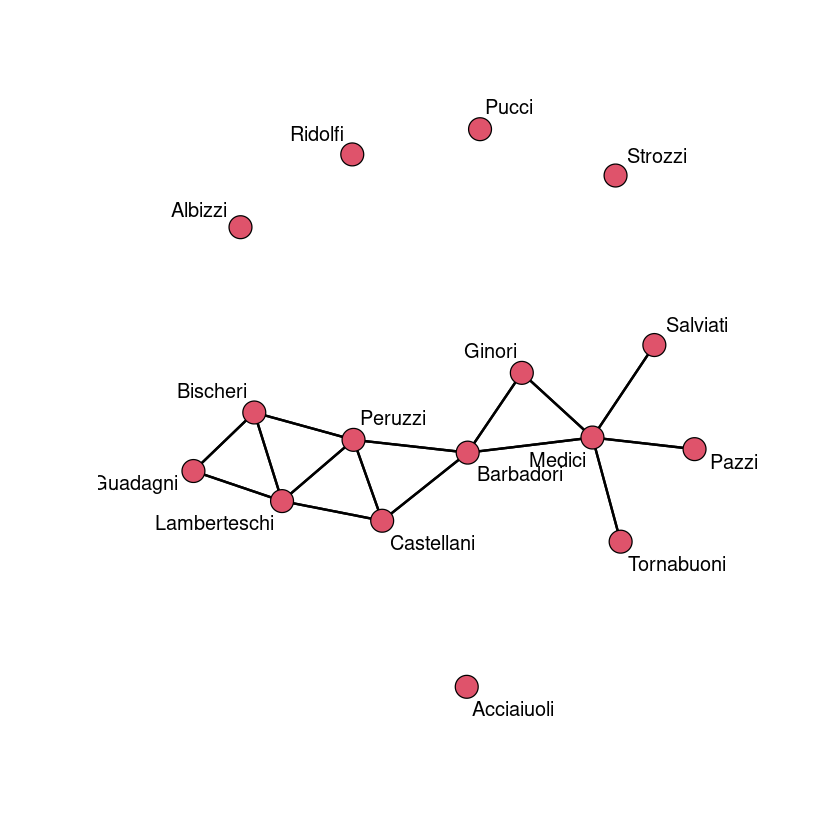

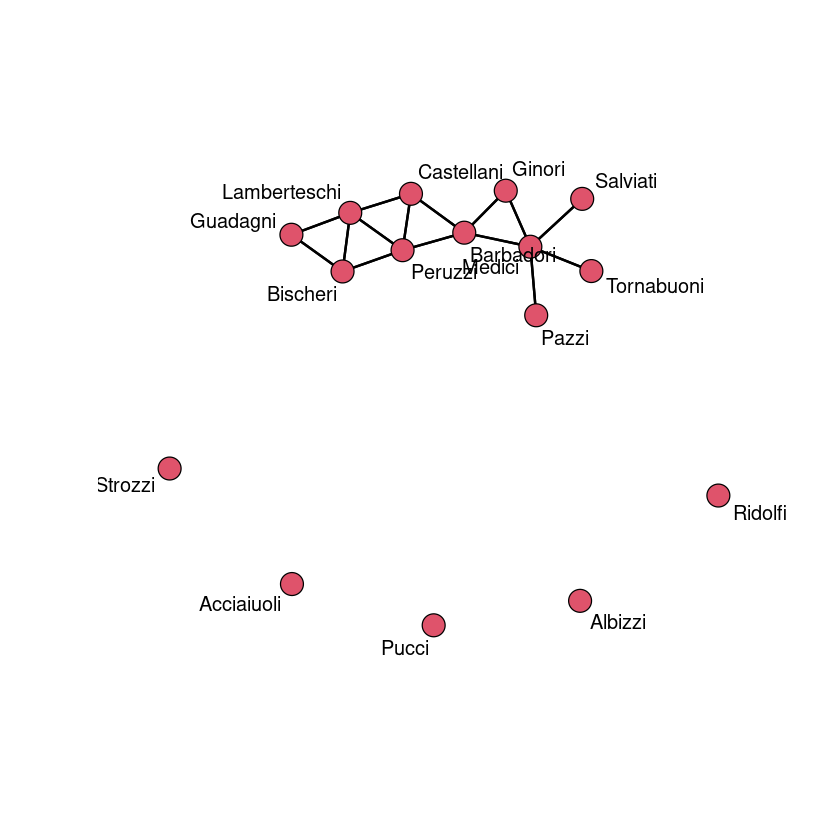

In [15]:
# Фрюхтерман—Рейнгольд
gplot(matr, gmode ="graph", mode = "fruchtermanreingold", displaylabels = TRUE)

# Камада—Каваи
gplot(matr,gmode ="graph",mode = "kamadakawai",displaylabels = TRUE)

Различие методов заключается в том, что алгоритм Фрюхтермана—Рейнгольда рассматривает граф как динамическую систему из физических тел, у которых определены силы тяготения между собой: притяжения (для смежных вершин) и отталкивания (для всех вершин), алгоритм симулирует эту систему, ожидая, что искомая укладка - это положение равновесия данной системы.

Алгоритм Камада—Каваи рассматривает граф как систему пружин, где пружины - это ребра между вершинами,на каждом шаге проводится локальная оптимизация с целью минимизировать потенциальную энергию всей системы, подбирая координаты одной вершины. Также можно заметить,  после работы этого алгоритма ребра графа имеют почти одинаковую длину, это связанно с тем что один из параметров алгоритма - $L$ это желаемая длинна ребер в укладке.

### Задание 6

Вывести «описательную сводку» сети.

In [16]:
summary(matr)

Network attributes:
  vertices = 16
  directed = FALSE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 15 
   missing edges = 0 
   non-missing edges = 15 
 density = 0.125 

Vertex attributes:
  vertex.names:
   character valued attribute
   16 valid vertex names

No edge attributes

Network edgelist matrix:
      [,1] [,2]
 [1,]    5    3
 [2,]    6    3
 [3,]    9    3
 [4,]   11    3
 [5,]    7    4
 [6,]    8    4
 [7,]   11    4
 [8,]    8    5
 [9,]   11    5
[10,]    9    6
[11,]    8    7
[12,]   11    8
[13,]   10    9
[14,]   14    9
[15,]   16    9

### Задание 7
Вычислить «пятичисловую сводку» сети:

(a) Вычислить размер сети.

(b) Вычислить плотность сети вручную и с помощью соответствующей функции. Сделать выводы.

(c) Определить число компонент в сети по графику. Подтвердить свои догадки с помощью соответствующей функции. Сделать выводы.

(d) Вычислить диаметр сети. Сделать выводы

(e) Вычислить коэффициент кластеризации. Сделать выводы.

In [18]:
size <- network.size(matr)

data <- data.frame(
  Size = size,
  Density = 2*network.edgecount(matr) / (size*(size-1)), # Формула из теории
  Comps = components(matr),
  Diam = diameter(graph),
  Claster = gtrans(matr, mode = "graph")
)

data

Size,Density,Comps,Diam,Claster
<dbl>,<dbl>,<int>,<dbl>,<dbl>
16,0.125,6,5,0.4166667


В графе видно, что в сети есть 6 КС, что подтверждает соответствующая функция.


---


Плотность сети равна $0.125$, что говорит о том, что граф содержит всего $\frac{1}{8}$ возможных ребер. Учитывая 5 изолированных вершин, такого результата можно ожидать. Даже внутри КС мы видим довольно низкую плотность ребер, это говорит о том, что в сети скорее всего мы сможем найти точки сочленения. Практически, делаем вывод о том, что в целом, деловые связи между многими семьями не существуют.


---


Сеть имеет 6 КС, 5 из которых - это изолированные вершины, это говорит о том, что существуют семьи, которые не вовлечены в деловые отношения, но те семьи, которые вовлечены образуют связную сеть, это говорит о том, что все такие семьи, влияют друг на друга.

---

Диаметр сети равен $5$, это значит, что между парой семей будет в худшем случае 4 семьи-посредника, этот результат можно было ожидать, исходя из плотности сети.

---

Кластеризация достаточно высока, так как на изображении графа видно много треугольников это не нарушает логики.

### Задание 8

Заполнить таблицу для различных мер центральности. Примечание: меры центральности вычислить для неизолированных вершин:



In [19]:
v <- 1 # Итератор
cop_matr <- matr # Копируем сеть
to_del <- c() # Вектор для изолированных вершин

for (x in rowSums(as.matrix(matr))) { # У изолированных вершин сумма рядов = 0
  if (x == 0) {
    to_del <- c(to_del, v)
  }
  v <- v + 1
}



delete.vertices(cop_matr, to_del) # Удаляем изолированные вершины
g <- network.size(cop_matr)

table <- data.frame(
  n = cop_matr %v% 'vertex.names',

  C_D = round(degree(cop_matr) / (2*(g-1)), 2),
  C_C = round(closeness(cop_matr), 2),
  C_B = round(betweenness(cop_matr) / ((g-1)*(g-2)/2), 2),
  C_i = round(infocent(cop_matr) / sum(infocent(cop_matr)), 2)
)

table

n,C_D,C_C,C_B,C_i
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Barbadori,0.4,0.59,1.11,0.12
Bischeri,0.3,0.40,0.11,0.09
Castellani,0.3,0.50,0.22,0.10
Ginori,0.2,0.45,0.00,0.10
Guadagni,0.2,0.31,0.00,0.08
Lamberteschi,0.4,0.42,0.27,0.10
Medici,0.5,0.53,1.07,0.11
Pazzi,0.1,0.36,0.00,0.06
Peruzzi,0.4,0.53,0.60,0.11


Рассмотрим центральность по степени: Семья Medici имеет наибольшее значение, что означает, что она имеет наибольшее количество деловых соглашений с другими семьями. Cемьи (Salviati, Tornabuoni, Pazzi) имеют только одну связь, поэтому их значения являются наименьшими.


---


Рассмотрим центральность по близости: Семья Barbadori имеет наибольшее значение, потому что она расположена в самом центре сети, будучи связующей для двух кластеров.

---


Рассмотрим центральность по посреднечеству: Семьи Barbadori и Medici - наиболее важные с точки зрения связи между разными семьями, большая часть сделок между различными семьями проходит через них.

---

Рассмотрим центральность по информации: Она распределена примерно равномерно по сети.

### Задание 9.
Выполнить п. 2–7 для направленной сети из файла krackhardt_advice.csv
(для нечётных вариантов) и файла krackhardt_friendship.csv
(для чётных вариантов).

#### Задание 2.
Преобразовать социоматрицу в список рёбер. Вывести первые 5 элементов списка рёбер.

In [20]:
# Считываем таблицу без заголовков, тип - data frame
table <- read.csv('./krackhardt_advice.csv', header=FALSE, skip = 2)
# Преобразование в граф из igraph
graph <- igraph::graph_from_adjacency_matrix(as.matrix(table))

# Социоматрица графа
network <- igraph::as_adjacency_matrix(graph)
# Читаем граф как список смежности
edges <- igraph::as_edgelist(graph)
head(edges, 5)

V1,V2
V1,V4
V1,V8
V1,V16
V1,V18


#### Задание 3.
Присвоить имена столбцам и строкам социоматрицы (имена — первая строка в csv-файле после комментариев).

In [21]:
# Считываем имена из csv
name <- c(
  "Marcus", "Caesar", "Claudius",
  "Lucius", "Octavianus", "Tiberius",
  "Cornelia", "Horatius", "Iulia",
  "Gaius", "Cassius", "Brutus",
  "Marcia", "Nero", "Ovidius",
  "Publius", "Quintus", "Romulus",
  "Seneca", "Titus", "Severina"
)
rownames(network) <- name
colnames(network) <- name

network

   [[ suppressing 21 column names ‘Marcus’, ‘Caesar’, ‘Claudius’ ... ]]



21 x 21 sparse Matrix of class "dgCMatrix"
                                                    
Marcus     . 1 . 1 . . . 1 . . . . . . . 1 . 1 . . 1
Caesar     . . . . . 1 1 . . . . . . . . . . . . . 1
Claudius   1 1 . 1 . 1 1 1 1 1 1 1 . 1 . . 1 1 . 1 1
Lucius     1 1 . . . 1 . 1 . 1 1 1 . . . 1 1 1 . 1 1
Octavianus 1 1 . . . 1 1 1 . 1 1 . 1 1 . 1 1 1 1 1 1
Tiberius   . . . . . . . . . . . . . . . . . . . . 1
Cornelia   . 1 . . . 1 . . . . 1 1 . 1 . . 1 1 . . 1
Horatius   . 1 . 1 . 1 1 . . 1 1 . . . . . . 1 . . 1
Iulia      1 1 . . . 1 1 1 . 1 1 1 . 1 . 1 1 1 . . 1
Gaius      1 1 1 1 1 . . 1 . . 1 . 1 . 1 1 1 1 1 1 .
Cassius    1 1 . . . . 1 . . . . . . . . . . . . . .
Brutus     . . . . . . 1 . . . . . . . . . . . . . 1
Marcia     1 1 . . 1 . . . 1 . . . . 1 . . . 1 . . .
Nero       . 1 . . . . 1 . . . . . . . . . . 1 . . 1
Ovidius    1 1 1 1 1 1 1 1 1 1 1 1 1 1 . 1 1 1 1 1 1
Publius    1 1 . . . . . . . 1 . . . . . . . 1 . . .
Quintus    1 1 . 1 . . 1 . . . . . . . . . . . . . 1
Rom

#### Задание 4.
С помощью соответствующих функций по полученной социоматрице построить ненаправленную сеть. Объяснить параметры, передаваемые в функцию.

In [22]:
# Параметры:
# matrix.type - тип входной матрицы, допустимы значения
# - edgelist
# - adjacency
# - incidence
# directed - булево значение, определяет, будет ли построенная сеть направленной
web <- network(as.matrix(network), matrix.type = "adjacency", directed = TRUE)
web

 Network attributes:
  vertices = 21 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 190 
    missing edges= 0 
    non-missing edges= 190 

 Vertex attribute names: 
    vertex.names 

No edge attributes

#### Задание 5.
Отобразить сеть с помощью алгоритмов укладки Фрюхтермана—Рейнгольда и Камада—Каваи. Объяснить, в чём различие между алгоритмами и укладками.

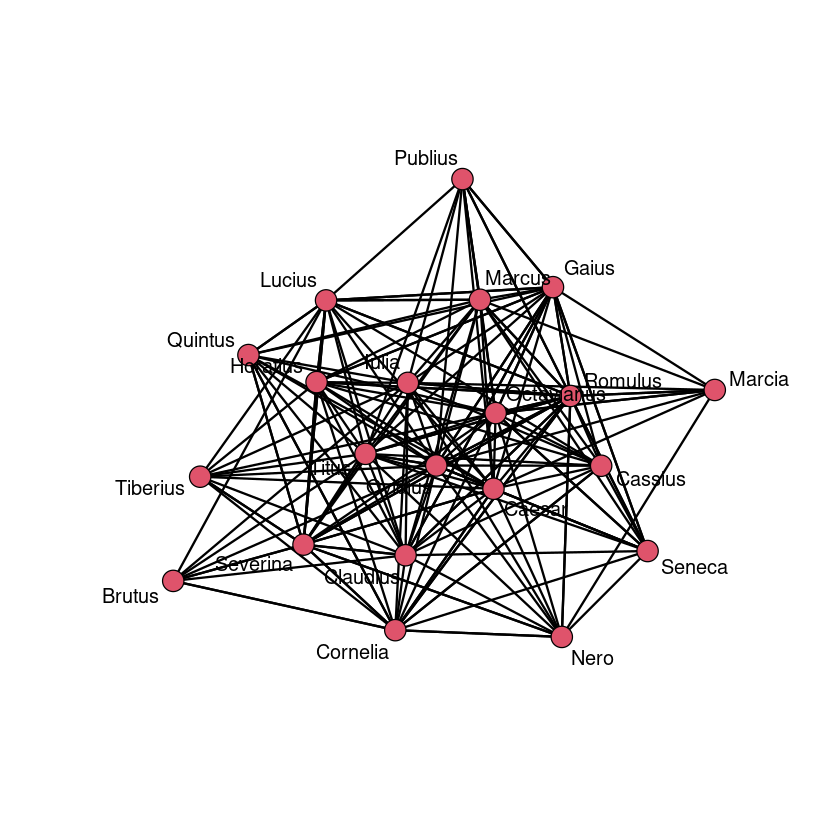

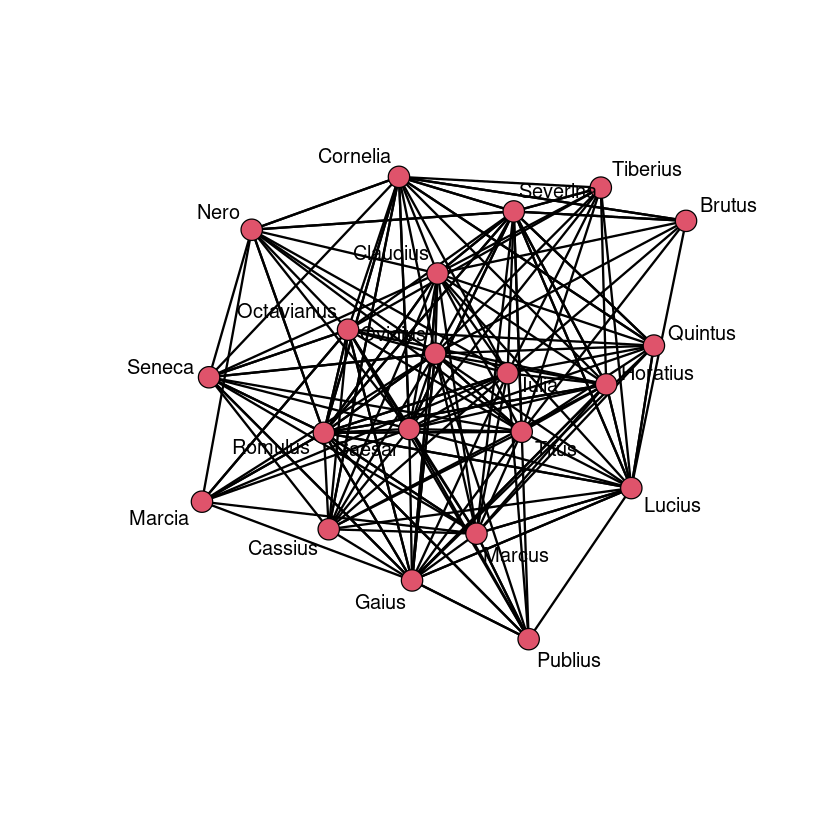

In [25]:
# Фрюхтерман—Рейнгольд
gplot(web, gmode ="graph", mode = "fruchtermanreingold", displaylabels = TRUE)

# Камада—Каваи
gplot(web,gmode ="graph",mode = "kamadakawai",displaylabels = TRUE)

Из-за большого количество ребер, качественное сравнение укладок графов затруднительно, но исходя из выше сказанного в 5-ом номере, длина ребер в методе Камада—Каваи более близкая по значениям чем в методе Фрюхтермана—Рейнгольда.


#### Задание 6
Вывести «описательную сводку» сети.

In [24]:
summary(web)

Network attributes:
  vertices = 21
  directed = TRUE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 190 
   missing edges = 0 
   non-missing edges = 190 
 density = 0.452381 

Vertex attributes:
  vertex.names:
   character valued attribute
   21 valid vertex names

No edge attributes

Network edgelist matrix:
       [,1] [,2]
  [1,]    3    1
  [2,]    4    1
  [3,]    5    1
  [4,]    9    1
  [5,]   10    1
  [6,]   11    1
  [7,]   13    1
  [8,]   15    1
  [9,]   16    1
 [10,]   17    1
 [11,]   18    1
 [12,]   19    1
 [13,]   20    1
 [14,]    1    2
 [15,]    3    2
 [16,]    4    2
 [17,]    5    2
 [18,]    7    2
 [19,]    8    2
 [20,]    9    2
 [21,]   10    2
 [22,]   11    2
 [23,]   13    2
 [24,]   14    2
 [25,]   15    2
 [26,]   16    2
 [27,]   17    2
 [28,]   18    2
 [29,]   19    2
 [30,]   20    2
 [31,]   21    2
 [32,]   10    3
 [33,]   15    3
 [34,]   18    3
 [35,]   19    3
 [36,]   21    3
 [37,]    1    4
 

#### Задание 7.
Вычислить «пятичисловую сводку» сети:

(a) Вычислить размер сети.

(b) Вычислить плотность сети вручную и с помощью соответствующей функции. Сделать выводы.

(c) Определить число компонент в сети по графику. Подтвердить свои догадки с помощью соответствующей функции. Сделать выводы.

(d) Вычислить диаметр сети. Сделать выводы

(e) Вычислить коэффициент кластеризации. Сделать выводы.

In [26]:
size <- network.size(web)

report <- data.frame(
  Size = size,
  Density = network.edgecount(web) / (size*(size-1)), # Формула из теории, но без 2
  Comps = count_components(graph, mode="strong"),
  Diam = diameter(graph),
  Claster = gtrans(web, mode = "graph")
)

report

Size,Density,Comps,Diam,Claster
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21,0.452381,1,3,0.6639785


Плотность сети равна почти половине, этот показатель демонстрирует то, что менеджеры много взаимодействуют друг с другом.


---

Граф имеет 1 КС, что можно рассмотреть по его укладке, так как все вершины соедены между собой. Это говорит о том, что каждый менеджер вовлечен в единую сеть.


---

Диаметр равен $3$, это довольно низкий показатель, говорит о том, что все менеджеры достаточно близки и скорее всего имеют единую область деятельности.

---

Кластеризация высокая, что и следовало ожидать из прошлых показателей.


### Задание 10
Заполнить таблицу для различных мер престижа:



In [29]:
s <- network.size(web)

# Найдем престиж по близости
closeness_in <- igraph::closeness(graph, mode = "in", normalized = FALSE)
# Мера близости по входящем вершинам
I_i <- colSums(igraph::distances(graph, mode = "in") > 0)
# Количество вершин, достигающих эту
сloseness <- (I_i^2 / (s - 1)) * closeness_in

# Найдет престиж по Рангу
X <- as.matrix(table)
lambda_max <- ceiling(max(Re(eigen(X)$values)))
a <- 1 / lambda_max
I_mat <- diag(ncol(X))
P_R <- solve((1/a) * I_mat - t(X), colSums(X))

# Нормировка престижа по рангу
m <- 1
for (k in 1:(s-1)) {
    m <- m + (a^k) * factorial(s-1) / factorial(s-1-k)
}

P_R_norm <- P_R / m

centrality_table <- data.frame(
  n = web %v% 'vertex.names',
  P_D = degree(web, cmode = "indegree") / (s-1),
  P_P = round(сloseness, 2),
  P_R = round(P_R_norm, 4)
)

centrality_table

,n,P_D,P_P,P_R
,<chr>,<dbl>,<dbl>,<dbl>
V1,Marcus,0.65,0.67,0.0094
V2,Caesar,0.90,0.91,0.0155
V3,Claudius,0.25,0.56,0.0047
V4,Lucius,0.40,0.62,0.0079
V5,Octavianus,0.25,0.50,0.0035
V6,Tiberius,0.50,0.67,0.0095
V7,Cornelia,0.65,0.74,0.0118
V8,Horatius,0.50,0.67,0.0086
V9,Iulia,0.20,0.49,0.0029


Из вычисленных характеристик видно, что акторы Caesar, Severina, Romulus имеют нибольшие показатели престижа, что говорит о их высоком влиянии на других акторов этой сети.

## Выводы

На нескольких примерах мы провели анализ двух сетей. С помощью библиотек statnet, igraph и теоретических знаний по "Теории Сетей", выявлены их структурные особенности, различные характеристики, такие как меры центральности и приситжа, представлена визуализация исследуемых сетей.